Name: McHale Trotter

# Particle Distribution of Water Inside a Filter

In this simulation, we will model a collection of particles. Each particle has a mass of 2 kg and a radius of 0.5 meters. The particles will be thrown in the negative y direction into a lattice of rods representing a filter. We predict that a more dense setup of rods will yield less distribution of particles through the filter. We also predict that a higher radius ball will not go as far through the filter.

## Research Questions

1. How does the distance between rods affect the distribution of the particles in the filter?


2. How does changing the radius of the particles effect the distribution of particles in the filter?


## Computational Model

The simulation of the filter is below. The length of the box is 60 by 40 meters with the origin in the center of the box. The particles are generated at the top of the box at random locations along the x-axis. All particles are given the same initial velocity, and this velocity will not change in magnitude throughout the simulation. 

The following variables will affect how long it takes to run the model:

N = 120: Total number of particles

Nsteps = 50: Total number of time steps for the while loop

In [1]:
from vpython import *
import numpy as np
import random as rand
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

## Changing the distance between the rods

The following cell represents a filter with rods only one meter apart.

In [2]:
scene=canvas()


m = 2 # kg
Rball = 0.5 #radius of ball in m
Rrod = 0.25 #radius of rod in m
vBall = vec(0, -150, 0)

#creating the box
Lwall = box(pos = vec(-30, 0, 0), size = vec(0.4, 40, 10), color=color.white)
Rwall = box(pos = vec(30, 0, 0), size = vec(0.4, 40, 10), color=color.white)
Bwall = box(pos = vec(0, -20, 0), size = vec(60, 0.4, 10), color=color.white)

rods = [] # list of rods

#creating the rods
x = -30
y = 19.5
i = 0
while i < 20:
    x+=1
    rod = cylinder(pos = vector(x, y, -5), radius = Rrod, axis = vec(0,0,10))
    rods.append(rod)
    if x >= 27:
        y-=2
        x=-30
        if i % 2 == 0:
            x = -29.25
        i+=1


balls = [] # list of balls

N = 100 # number of balls

#create balls
for i in range(N):
        ball = sphere(pos = vec(rand.uniform(-28, 28), 20, 0), radius = Rball, color = color.red)

        ball.v = vBall # m/s
        ball.p = m*ball.v
        
        balls.append(ball)


#check for collisions with rods
t = 0
dt = 0.01

scene.pause()
Nsteps = 50
while t < Nsteps*dt:
    rate(200)
    
    
    #handle collisions with balls and rods    
    for ball in balls:
        ball.pos = ball.pos + ball.v*dt
        
        if ball.pos.x > 30:
            ball.v.x = - abs(ball.v.x)
            ball.p = m*ball.v
        elif ball.pos.x < -30:
            ball.v.x = abs(ball.v.x)
            ball.p = m*ball.v
        if ball.pos.y < -20:
            ball.v.y = abs(ball.v.y)
            ball.p = m*ball.v


        for rod in rods:    
            center = rod.pos + 1/2*rod.axis
            r = ball.pos - center
            if mag(r) < Rrod + Rball:
                rhat = hat(r)
                vballrad = dot(ball.v, rhat)*rhat #rad comp of ball.v
                vballtan = ball.v - vballrad #tan comp of ball.v
                vballrad = - vballrad #reverse ball.rad due to collision
                ball.v = vballtan + vballrad #new ball.v after collision

        #check for balls that have bounced up and stop them
        if ball.pos.y > 22:
            ball.v = vec(0, 0, 0)
            
            
    t = t + dt




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

As you can see from the graph below, most of the particles didn't even get past the first layer of the filter. In the next model, the rods will be 2 meters apart, and we should expect to see particles make it further through the filter.

In [ ]:
positions = [ball.pos.y for ball in balls]

plt.hist(positions)
plt.xlabel('Y position')
plt.ylabel('# of balls')
plt.title('Final Y position of Balls')

In [ ]:
scene=canvas()


m = 2 # kg
Rball = 0.5 #radius of ball in m
Rrod = 0.25 #radius of rod in m
vBall = vec(0, -150, 0)

#creating the box
Lwall = box(pos = vec(-30, 0, 0), size = vec(0.4, 40, 10), color=color.white)
Rwall = box(pos = vec(30, 0, 0), size = vec(0.4, 40, 10), color=color.white)
Bwall = box(pos = vec(0, -20, 0), size = vec(60, 0.4, 10), color=color.white)

rods = [] # list of rods

#creating the rods
x = -30
y = 19.5
i = 0
while i < 20:
    x+=2
    rod = cylinder(pos = vector(x, y, -5), radius = Rrod, axis = vec(0,0,10))
    rods.append(rod)
    if x >= 27:
        y-=2
        x=-30
        if i % 2 == 0:
            x = -29.25
        i+=1


balls = [] # list of balls

N = 100 # number of balls

#create balls
for i in range(N):
        ball = sphere(pos = vec(rand.uniform(-28, 28), 20, 0), radius = Rball, color = color.red)

        ball.v = vBall # m/s
        ball.p = m*ball.v
        
        balls.append(ball)


#check for collisions with rods
t = 0
dt = 0.01

scene.pause()
Nsteps = 50
while t < Nsteps*dt:
    rate(200)
    
    
    #handle collisions with balls and rods    
    for ball in balls:
        ball.pos = ball.pos + ball.v*dt
        
        if ball.pos.x > 30:
            ball.v.x = - abs(ball.v.x)
            ball.p = m*ball.v
        elif ball.pos.x < -30:
            ball.v.x = abs(ball.v.x)
            ball.p = m*ball.v
        if ball.pos.y < -20:
            ball.v.y = abs(ball.v.y)
            ball.p = m*ball.v


        for rod in rods:    
            center = rod.pos + 1/2*rod.axis
            r = ball.pos - center
            if mag(r) < Rrod + Rball:
                rhat = hat(r)
                vballrad = dot(ball.v, rhat)*rhat #rad comp of ball.v
                vballtan = ball.v - vballrad #tan comp of ball.v
                vballrad = - vballrad #reverse ball.rad due to collision
                ball.v = vballtan + vballrad #new ball.v after collision

        #check for balls that have bounced up and stop them
        if ball.pos.y > 22:
            ball.v = vec(0, 0, 0)
            
            
    t = t + dt




In [ ]:
positions = [ball.pos.y for ball in balls]

plt.hist(positions)
plt.xlabel('Y position')
plt.ylabel('# of balls')
plt.title('Final Y position of Balls')

From the graph, it's easy to see that the particles permeated many more layers of the filter. Some particles didn't even come in contact with a rod.

## Changing the radius of the particles

In the following model, the particles have a radius of 0.5 meters and the rods have a radius of 0.25 meters. We should expect to see a similar result to the first model of this simulation.

In [3]:
scene=canvas()

m = 2 # kg
Rball = 0.5 #radius of ball in m
Rrod = 0.25 #radius of rod in m
vBall = vec(0, -150, 0)

#creating the box
Lwall = box(pos = vec(-30, 0, 0), size = vec(0.4, 40, 10), color=color.white)
Rwall = box(pos = vec(30, 0, 0), size = vec(0.4, 40, 10), color=color.white)
Bwall = box(pos = vec(0, -20, 0), size = vec(60, 0.4, 10), color=color.white)

rods = [] # list of rods

#creating the rods
x = -30
y = 19.5
i = 0
while i < 20:
    x+=2
    rod = cylinder(pos = vector(x, y, -5), radius = Rrod, axis = vec(0,0,10))
    rods.append(rod)
    if x >= 27:
        y-=2
        x=-30
        if i % 2 == 0:
            x = -29.25
        i+=1


balls = [] # list of balls

N = 100 # number of balls

#create balls
for i in range(N):
        ball = sphere(pos = vec(rand.uniform(-28, 28), 20, 0), radius = Rball, color = color.red)

        ball.v = vBall # m/s
        ball.p = m*ball.v
        
        balls.append(ball)


#check for collisions with rods
t = 0
dt = 0.01

scene.pause()
Nsteps = 50
while t < Nsteps*dt:
    rate(200)
    
    
    #handle collisions with balls and rods    
    for ball in balls:
        ball.pos = ball.pos + ball.v*dt
        
        if ball.pos.x > 30:
            ball.v.x = - abs(ball.v.x)
            ball.p = m*ball.v
        elif ball.pos.x < -30:
            ball.v.x = abs(ball.v.x)
            ball.p = m*ball.v
        if ball.pos.y < -20:
            ball.v.y = abs(ball.v.y)
            ball.p = m*ball.v


        for rod in rods:    
            center = rod.pos + 1/2*rod.axis
            r = ball.pos - center
            if mag(r) < Rrod + Rball:
                rhat = hat(r)
                vballrad = dot(ball.v, rhat)*rhat #rad comp of ball.v
                vballtan = ball.v - vballrad #tan comp of ball.v
                vballrad = - vballrad #reverse ball.rad due to collision
                ball.v = vballtan + vballrad #new ball.v after collision

        #check for balls that have bounced up and stop them
        if ball.pos.y > 22:
            ball.v = vec(0, 0, 0)
            
            
    t = t + dt


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Final Y position of Balls')

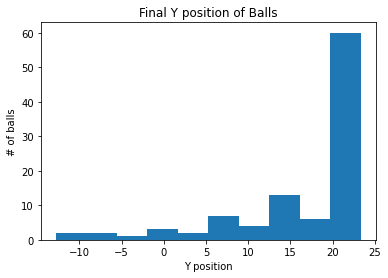

In [4]:
positions = [ball.pos.y for ball in balls]

plt.hist(positions)
plt.xlabel('Y position')
plt.ylabel('# of balls')
plt.title('Final Y position of Balls')

For the next model, the particles have a radius of 1 meter. Run the model to see how this affects particle distribution.

In [5]:
scene=canvas()

m = 2 # kg
Rball = 1 #radius of ball in m
Rrod = 0.25 #radius of rod in m
vBall = vec(0, -150, 0)

#creating the box
Lwall = box(pos = vec(-30, 0, 0), size = vec(0.4, 40, 10), color=color.white)
Rwall = box(pos = vec(30, 0, 0), size = vec(0.4, 40, 10), color=color.white)
Bwall = box(pos = vec(0, -20, 0), size = vec(60, 0.4, 10), color=color.white)

rods = [] # list of rods

#creating the rods
x = -30
y = 19.5
i = 0
while i < 20:
    x+=2
    rod = cylinder(pos = vector(x, y, -5), radius = Rrod, axis = vec(0,0,10))
    rods.append(rod)
    if x >= 27:
        y-=2
        x=-30
        if i % 2 == 0:
            x = -29.25
        i+=1


balls = [] # list of balls

N = 100 # number of balls

#create balls
for i in range(N):
        ball = sphere(pos = vec(rand.uniform(-28, 28), 20, 0), radius = Rball, color = color.red)

        ball.v = vBall # m/s
        ball.p = m*ball.v
        
        balls.append(ball)


#check for collisions with rods
t = 0
dt = 0.01

scene.pause()
Nsteps = 50
while t < Nsteps*dt:
    rate(200)
    
    
    #handle collisions with balls and rods    
    for ball in balls:
        ball.pos = ball.pos + ball.v*dt
        
        if ball.pos.x > 30:
            ball.v.x = - abs(ball.v.x)
            ball.p = m*ball.v
        elif ball.pos.x < -30:
            ball.v.x = abs(ball.v.x)
            ball.p = m*ball.v
        if ball.pos.y < -20:
            ball.v.y = abs(ball.v.y)
            ball.p = m*ball.v


        for rod in rods:    
            center = rod.pos + 1/2*rod.axis
            r = ball.pos - center
            if mag(r) < Rrod + Rball:
                rhat = hat(r)
                vballrad = dot(ball.v, rhat)*rhat #rad comp of ball.v
                vballtan = ball.v - vballrad #tan comp of ball.v
                vballrad = - vballrad #reverse ball.rad due to collision
                ball.v = vballtan + vballrad #new ball.v after collision

        #check for balls that have bounced up and stop them
        if ball.pos.y > 22:
            ball.v = vec(0, 0, 0)
            
            
    t = t + dt


<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Final Y position of Balls')

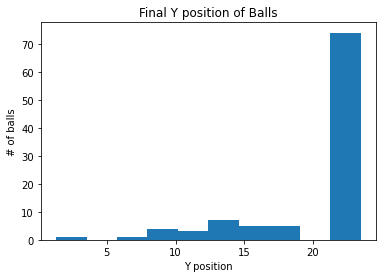

In [6]:
positions = [ball.pos.y for ball in balls]

plt.hist(positions)
plt.xlabel('Y position')
plt.ylabel('# of balls')
plt.title('Final Y position of Balls')

It seems that the particle distribution was far less for the particles with a higher radius.

## Conclusion

In this project, we simulated particles going through a filter made of solid rods. We determined that a more dense concentration of rods yields for less particle distribution throughout the model. We also determined that using particles with a larger radius decreases the span of particle distribution.

In general, the results of our model agree with our predictions of particle distribution in the filter.